In [1]:
import logging
from importlib import reload

import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

import homework_utils

2023-05-17 22:29:39.974428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))
print(tf.test.gpu_device_name())
tf.keras.mixed_precision.set_global_policy('mixed_float16')

logging.getLogger().setLevel(logging.INFO)

Num GPUs Available:  1
/device:GPU:0
Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  NVIDIA GeForce GTX 1080 Ti, compute capability 6.1
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


2023-05-17 22:29:42.482381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 22:29:42.486025: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 22:29:42.486288: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 22:29:42.487737: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 22:29:42.488030: I tensorflow/compile

In [3]:
# Load data into pandas DataFrame
df = pd.read_parquet("dataset/unscaled_train_data.parquet")

# Define the feature and target columns
feature_cols = df.columns[:-1]
target_col = df.columns[-1]
O = len(df[target_col].unique())
I = len(feature_cols)


# Define a function to create the Keras model
def create_model(hidden_size: int, lr: float = None, m: float = None):
    model = Sequential()
    model.add(Dense(hidden_size, input_dim=len(feature_cols), activation="sigmoid"))
    model.add(Dense(O, activation="softmax"))
    if lr and m:
        optimizer = SGD(learning_rate=lr, momentum=m)
    else:
        optimizer = Adam(learning_rate=0.01)
    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["categorical_crossentropy", "mean_squared_error", "accuracy"],
    )
    return model

In [4]:
hidden_layer_matrice = [
    {"hidden_size": O},
    {"hidden_size": int((I + O) / 2)},
    {"hidden_size": I + O},
]

reload(homework_utils)

hiddensize_test_resuts = homework_utils.wrap_test_case(
    hidden_layer_matrice, create_model, df[feature_cols].values, df[target_col].values
)


INFO:root:Running testcase {'hidden_size': 5}
2023-05-17 22:29:43.513377: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 22:29:43.513838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 22:29:43.514165: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-17 22:29:43.514646: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
20

Epoch 1/50


2023-05-17 22:29:45.169638: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f8aa40030a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-17 22:29:45.169687: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2023-05-17 22:29:45.176909: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-17 22:29:45.345185: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


   5/1326 [..............................] - ETA: 35s - loss: 1.7133 - categorical_crossentropy: 1.7135 - mean_squared_error: 0.1697 - accuracy: 0.2400 

2023-05-17 22:29:45.491648: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1326/1326 [==============================] - 27s 19ms/step - loss: 0.5008 - categorical_crossentropy: 0.5008 - mean_squared_error: 0.0499 - accuracy: 0.8328 - val_loss: 0.3305 - val_categorical_crossentropy: 0.3305 - val_mean_squared_error: 0.0333 - val_accuracy: 0.8905
Epoch 2/50
1326/1326 [==============================] - 26s 20ms/step - loss: 0.3167 - categorical_crossentropy: 0.3167 - mean_squared_error: 0.0319 - accuracy: 0.8937 - val_loss: 0.3028 - val_categorical_crossentropy: 0.3028 - val_mean_squared_error: 0.0303 - val_accuracy: 0.9014
Epoch 3/50
1326/1326 [==============================] - 26s 20ms/step - loss: 0.2956 - categorical_crossentropy: 0.2956 - mean_squared_error: 0.0294 - accuracy: 0.9031 - val_loss: 0.2869 - val_categorical_crossentropy: 0.2868 - val_mean_squared_error: 0.0283 - val_accuracy: 0.9043
Epoch 4/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.2831 - categorical_crossentropy: 0.2831 - mean_squared_error: 0.0277 - accuracy: 0.90

INFO:root:Running testcase {'hidden_size': 10}


Epoch 1/50
1326/1326 [==============================] - 25s 18ms/step - loss: 0.3833 - categorical_crossentropy: 0.3833 - mean_squared_error: 0.0381 - accuracy: 0.8756 - val_loss: 0.2123 - val_categorical_crossentropy: 0.2123 - val_mean_squared_error: 0.0207 - val_accuracy: 0.9341
Epoch 2/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.1835 - categorical_crossentropy: 0.1835 - mean_squared_error: 0.0178 - accuracy: 0.9445 - val_loss: 0.1714 - val_categorical_crossentropy: 0.1714 - val_mean_squared_error: 0.0162 - val_accuracy: 0.9509
Epoch 3/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.1583 - categorical_crossentropy: 0.1583 - mean_squared_error: 0.0151 - accuracy: 0.9531 - val_loss: 0.1531 - val_categorical_crossentropy: 0.1531 - val_mean_squared_error: 0.0144 - val_accuracy: 0.9556
Epoch 4/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.1473 - categorical_crossentropy: 0.1473 - mean_squared_error: 0.0140 - acc

INFO:root:Running testcase {'hidden_size': 20}


Epoch 1/50
1326/1326 [==============================] - 25s 18ms/step - loss: 0.2979 - categorical_crossentropy: 0.2979 - mean_squared_error: 0.0294 - accuracy: 0.9045 - val_loss: 0.1428 - val_categorical_crossentropy: 0.1428 - val_mean_squared_error: 0.0137 - val_accuracy: 0.9553
Epoch 2/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.1165 - categorical_crossentropy: 0.1165 - mean_squared_error: 0.0110 - accuracy: 0.9655 - val_loss: 0.1037 - val_categorical_crossentropy: 0.1036 - val_mean_squared_error: 0.0098 - val_accuracy: 0.9693
Epoch 3/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.0917 - categorical_crossentropy: 0.0917 - mean_squared_error: 0.0086 - accuracy: 0.9731 - val_loss: 0.0918 - val_categorical_crossentropy: 0.0918 - val_mean_squared_error: 0.0084 - val_accuracy: 0.9755
Epoch 4/50
1326/1326 [==============================] - 26s 19ms/step - loss: 0.0811 - categorical_crossentropy: 0.0810 - mean_squared_error: 0.0076 - acc

In [5]:
for result in hiddensize_test_resuts:
    print(result.testcase)
    homework_utils.print_scores(homework_utils.score_from_histories(result.histories))
    print("=" * 30)

{'hidden_size': 5}
Validation Cross Entropy: 0.2289 (+/- 0.0097)
Validation MSE: 0.0220 (+/- 0.0007)
Validation Accuracy: 0.9276 (+/- 0.0024)
{'hidden_size': 10}
Validation Cross Entropy: 0.1154 (+/- 0.0035)
Validation MSE: 0.0108 (+/- 0.0005)
Validation Accuracy: 0.9650 (+/- 0.0022)
{'hidden_size': 20}
Validation Cross Entropy: 0.0621 (+/- 0.0042)
Validation MSE: 0.0057 (+/- 0.0003)
Validation Accuracy: 0.9821 (+/- 0.0013)


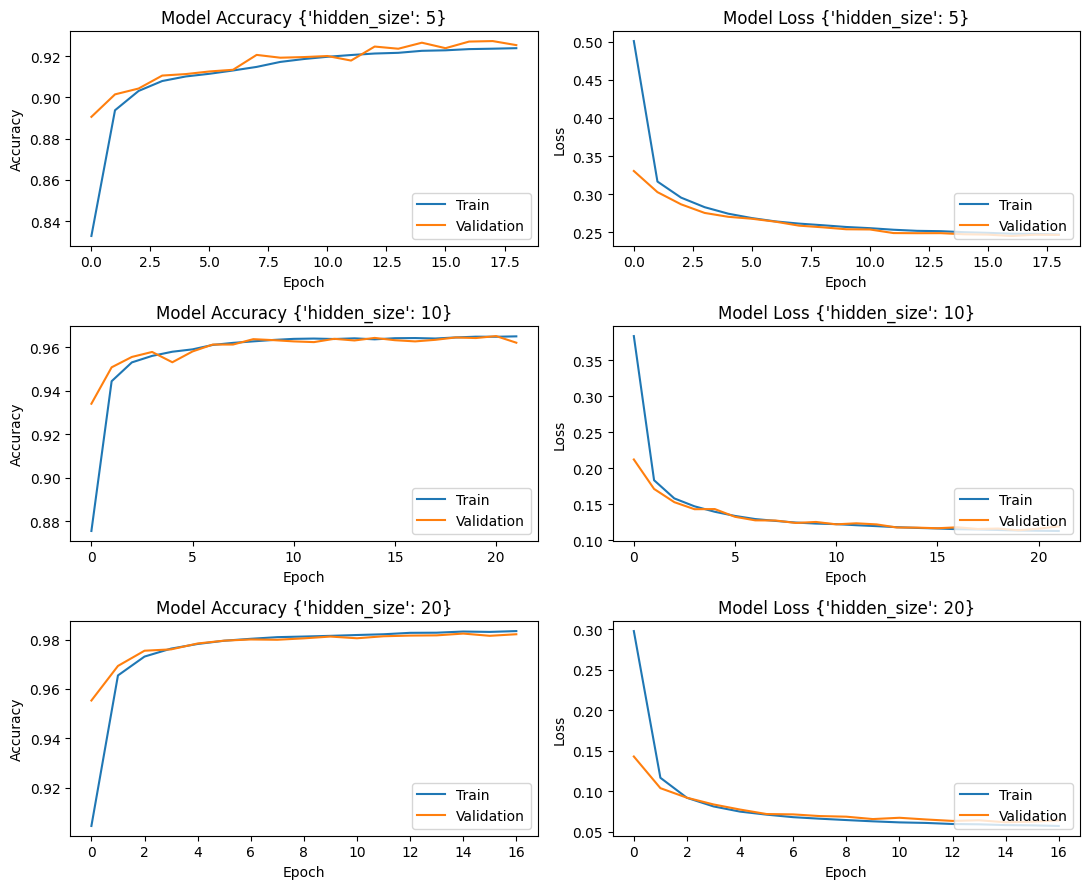

In [6]:
reload(homework_utils)

# set up the figure
homework_utils.figure_from_histories(
    [I.histories[0] for I in hiddensize_test_resuts],
    [I.testcase for I in hiddensize_test_resuts],
)

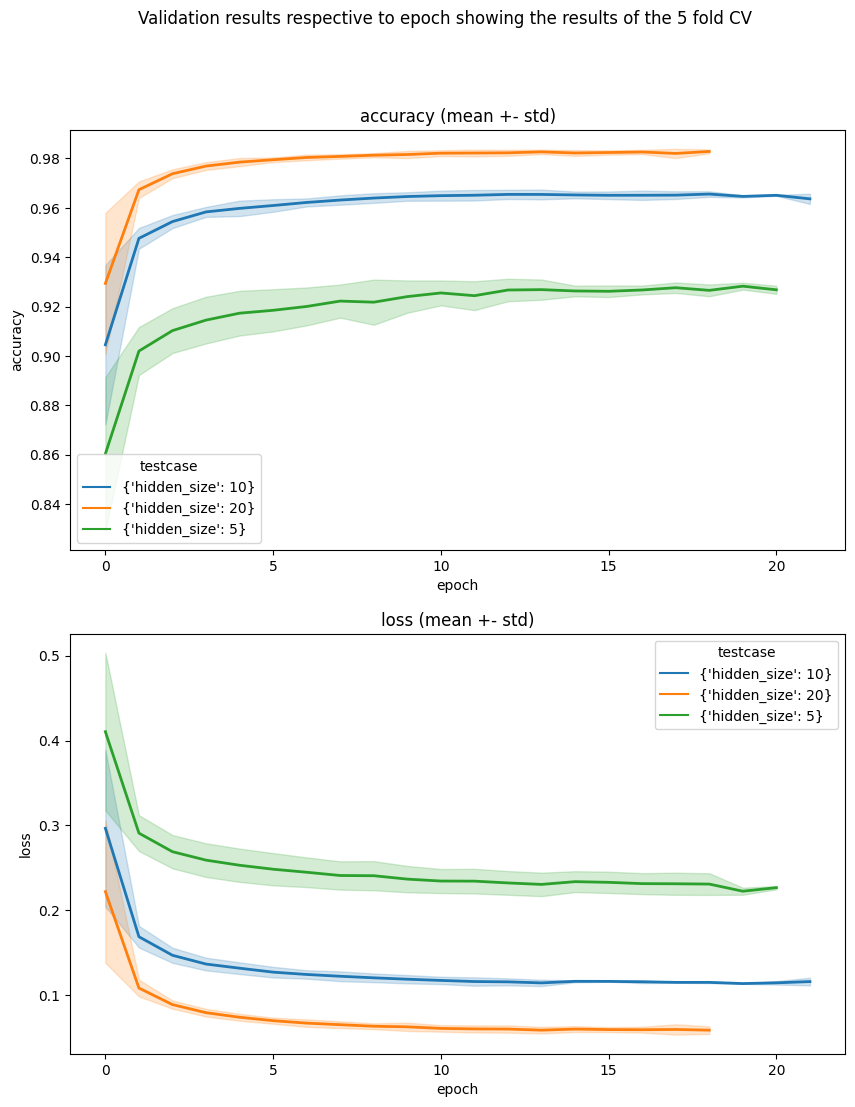

In [7]:
homework_utils.visualisation_with_confidence(
    hiddensize_test_resuts, validation_only=True
)

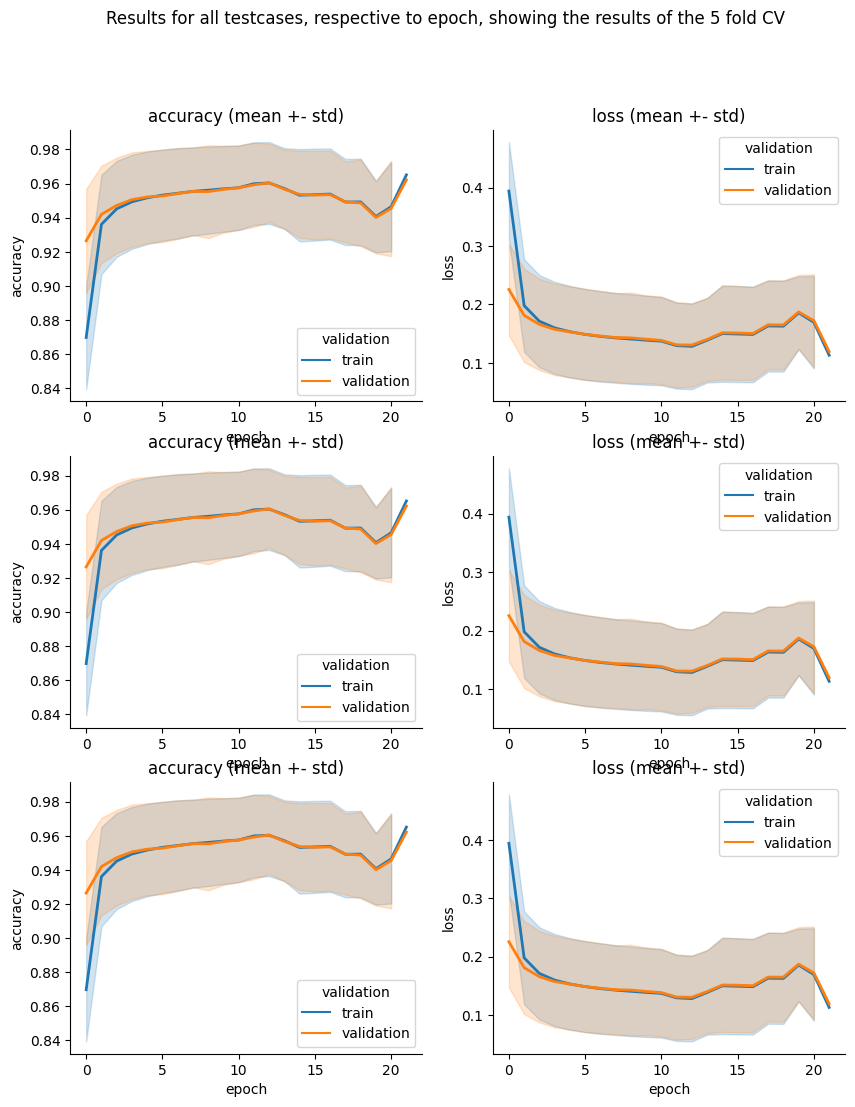

In [8]:
homework_utils.visualisation_with_confidence(
    hiddensize_test_resuts, validation_only=False
)

In [9]:
lr_m_matrice = [
    {"hidden_size": I + O, "lr": 0.001, "m": 0.2},
    {"hidden_size": I + O, "lr": 0.001, "m": 0.6},
    {"hidden_size": I + O, "lr": 0.05, "m": 0.6},
    {"hidden_size": I + O, "lr": 0.1, "m": 0.6},
]

lr_m_test_results = homework_utils.wrap_test_case(
    lr_m_matrice, create_model, df[feature_cols].values, df[target_col].values
)

INFO:root:Running testcase {'hidden_size': 20, 'lr': 0.001, 'm': 0.2}


Epoch 1/50
1326/1326 [==============================] - 25s 18ms/step - loss: 1.4678 - categorical_crossentropy: 1.4678 - mean_squared_error: 0.1491 - accuracy: 0.3643 - val_loss: 1.3716 - val_categorical_crossentropy: 1.3716 - val_mean_squared_error: 0.1401 - val_accuracy: 0.5227
Epoch 2/50
1326/1326 [==============================] - 24s 18ms/step - loss: 1.3143 - categorical_crossentropy: 1.3143 - mean_squared_error: 0.1334 - accuracy: 0.5671 - val_loss: 1.2586 - val_categorical_crossentropy: 1.2585 - val_mean_squared_error: 0.1271 - val_accuracy: 0.6346
Epoch 3/50
1326/1326 [==============================] - 24s 18ms/step - loss: 1.2132 - categorical_crossentropy: 1.2132 - mean_squared_error: 0.1215 - accuracy: 0.6641 - val_loss: 1.1667 - val_categorical_crossentropy: 1.1667 - val_mean_squared_error: 0.1162 - val_accuracy: 0.6818
Epoch 4/50
1326/1326 [==============================] - 24s 18ms/step - loss: 1.1291 - categorical_crossentropy: 1.1291 - mean_squared_error: 0.1116 - acc

INFO:root:Running testcase {'hidden_size': 20, 'lr': 0.001, 'm': 0.6}


Epoch 1/50
1326/1326 [==============================] - 25s 18ms/step - loss: 1.3829 - categorical_crossentropy: 1.3829 - mean_squared_error: 0.1390 - accuracy: 0.4722 - val_loss: 1.2489 - val_categorical_crossentropy: 1.2489 - val_mean_squared_error: 0.1247 - val_accuracy: 0.5975
Epoch 2/50
1326/1326 [==============================] - 24s 18ms/step - loss: 1.1696 - categorical_crossentropy: 1.1696 - mean_squared_error: 0.1154 - accuracy: 0.6481 - val_loss: 1.0995 - val_categorical_crossentropy: 1.0995 - val_mean_squared_error: 0.1076 - val_accuracy: 0.6782
Epoch 3/50
1326/1326 [==============================] - 24s 18ms/step - loss: 1.0507 - categorical_crossentropy: 1.0507 - mean_squared_error: 0.1023 - accuracy: 0.7016 - val_loss: 1.0059 - val_categorical_crossentropy: 1.0059 - val_mean_squared_error: 0.0979 - val_accuracy: 0.7082
Epoch 4/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.9743 - categorical_crossentropy: 0.9743 - mean_squared_error: 0.0948 - acc

INFO:root:Running testcase {'hidden_size': 20, 'lr': 0.05, 'm': 0.6}


Epoch 1/50
1326/1326 [==============================] - 25s 18ms/step - loss: 0.6417 - categorical_crossentropy: 0.6417 - mean_squared_error: 0.0652 - accuracy: 0.7883 - val_loss: 0.4905 - val_categorical_crossentropy: 0.4905 - val_mean_squared_error: 0.0502 - val_accuracy: 0.8357
Epoch 2/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.4221 - categorical_crossentropy: 0.4221 - mean_squared_error: 0.0432 - accuracy: 0.8552 - val_loss: 0.3640 - val_categorical_crossentropy: 0.3640 - val_mean_squared_error: 0.0367 - val_accuracy: 0.8787
Epoch 3/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.3234 - categorical_crossentropy: 0.3234 - mean_squared_error: 0.0321 - accuracy: 0.8978 - val_loss: 0.2898 - val_categorical_crossentropy: 0.2897 - val_mean_squared_error: 0.0282 - val_accuracy: 0.9134
Epoch 4/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.2656 - categorical_crossentropy: 0.2656 - mean_squared_error: 0.0258 - acc

INFO:root:Running testcase {'hidden_size': 20, 'lr': 0.1, 'm': 0.6}


Epoch 1/50
1326/1326 [==============================] - 25s 18ms/step - loss: 0.5393 - categorical_crossentropy: 0.5393 - mean_squared_error: 0.0549 - accuracy: 0.8149 - val_loss: 0.3619 - val_categorical_crossentropy: 0.3619 - val_mean_squared_error: 0.0361 - val_accuracy: 0.8882
Epoch 2/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.2887 - categorical_crossentropy: 0.2887 - mean_squared_error: 0.0287 - accuracy: 0.9101 - val_loss: 0.2396 - val_categorical_crossentropy: 0.2396 - val_mean_squared_error: 0.0234 - val_accuracy: 0.9290
Epoch 3/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.2123 - categorical_crossentropy: 0.2123 - mean_squared_error: 0.0207 - accuracy: 0.9356 - val_loss: 0.1911 - val_categorical_crossentropy: 0.1911 - val_mean_squared_error: 0.0185 - val_accuracy: 0.9429
Epoch 4/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.1748 - categorical_crossentropy: 0.1748 - mean_squared_error: 0.0169 - acc

In [10]:
for result in lr_m_test_results:
    print(result.testcase)
    homework_utils.print_scores(homework_utils.score_from_histories(result.histories))
    print("=" * 30)

{'hidden_size': 20, 'lr': 0.001, 'm': 0.2}
Validation Cross Entropy: 0.5856 (+/- 0.0097)
Validation MSE: 0.0599 (+/- 0.0010)
Validation Accuracy: 0.8030 (+/- 0.0060)
{'hidden_size': 20, 'lr': 0.001, 'm': 0.6}
Validation Cross Entropy: 0.4805 (+/- 0.0045)
Validation MSE: 0.0495 (+/- 0.0008)
Validation Accuracy: 0.8323 (+/- 0.0052)
{'hidden_size': 20, 'lr': 0.05, 'm': 0.6}
Validation Cross Entropy: 0.0750 (+/- 0.0011)
Validation MSE: 0.0069 (+/- 0.0001)
Validation Accuracy: 0.9785 (+/- 0.0006)
{'hidden_size': 20, 'lr': 0.1, 'm': 0.6}
Validation Cross Entropy: 0.0647 (+/- 0.0022)
Validation MSE: 0.0059 (+/- 0.0001)
Validation Accuracy: 0.9817 (+/- 0.0007)


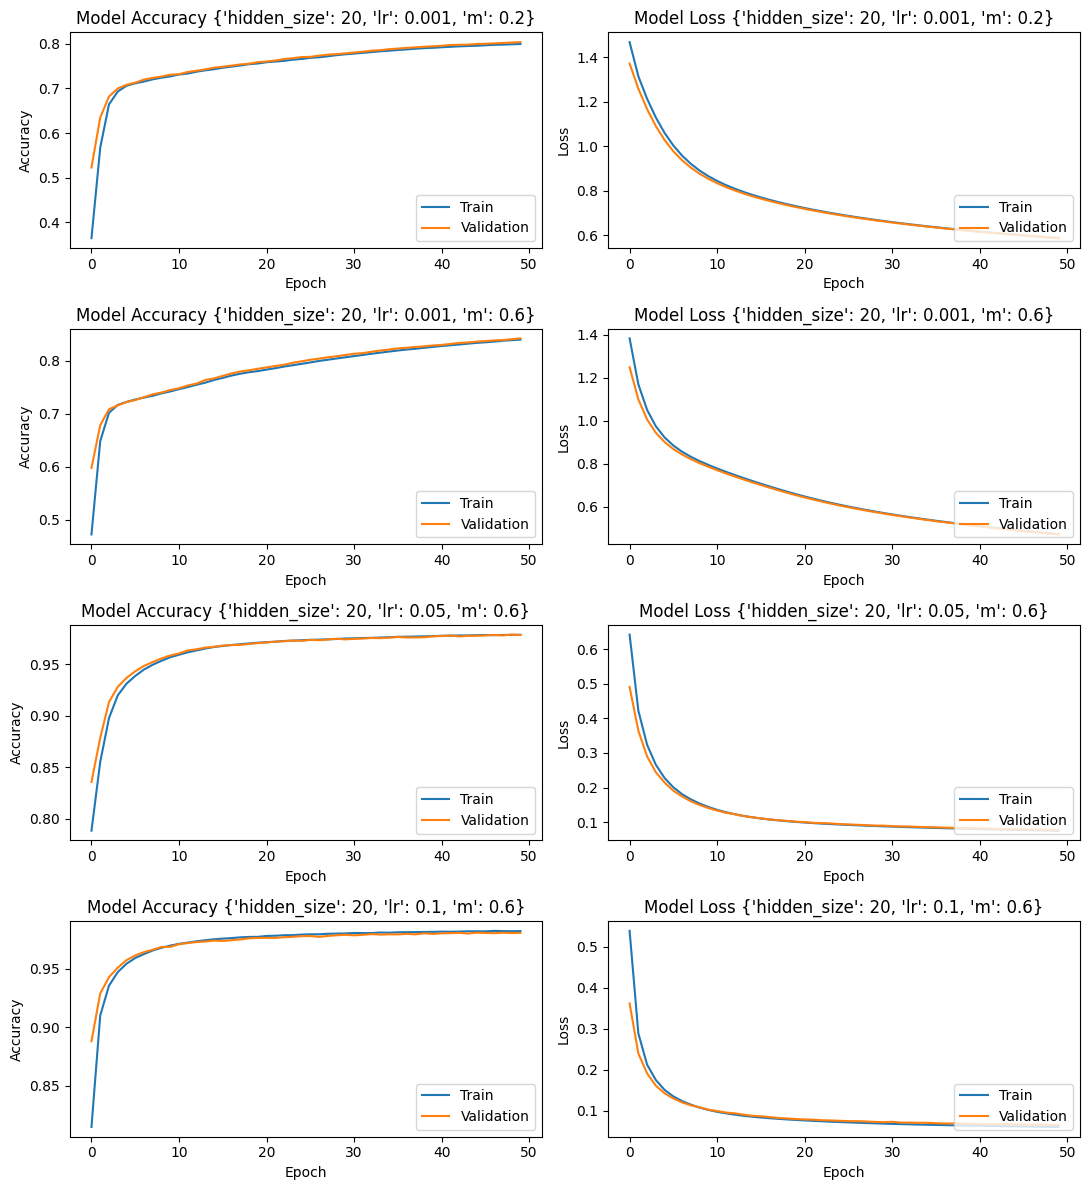

In [11]:
# set up the figure
homework_utils.figure_from_histories(
    [I.histories[0] for I in lr_m_test_results], [I.testcase for I in lr_m_test_results]
)

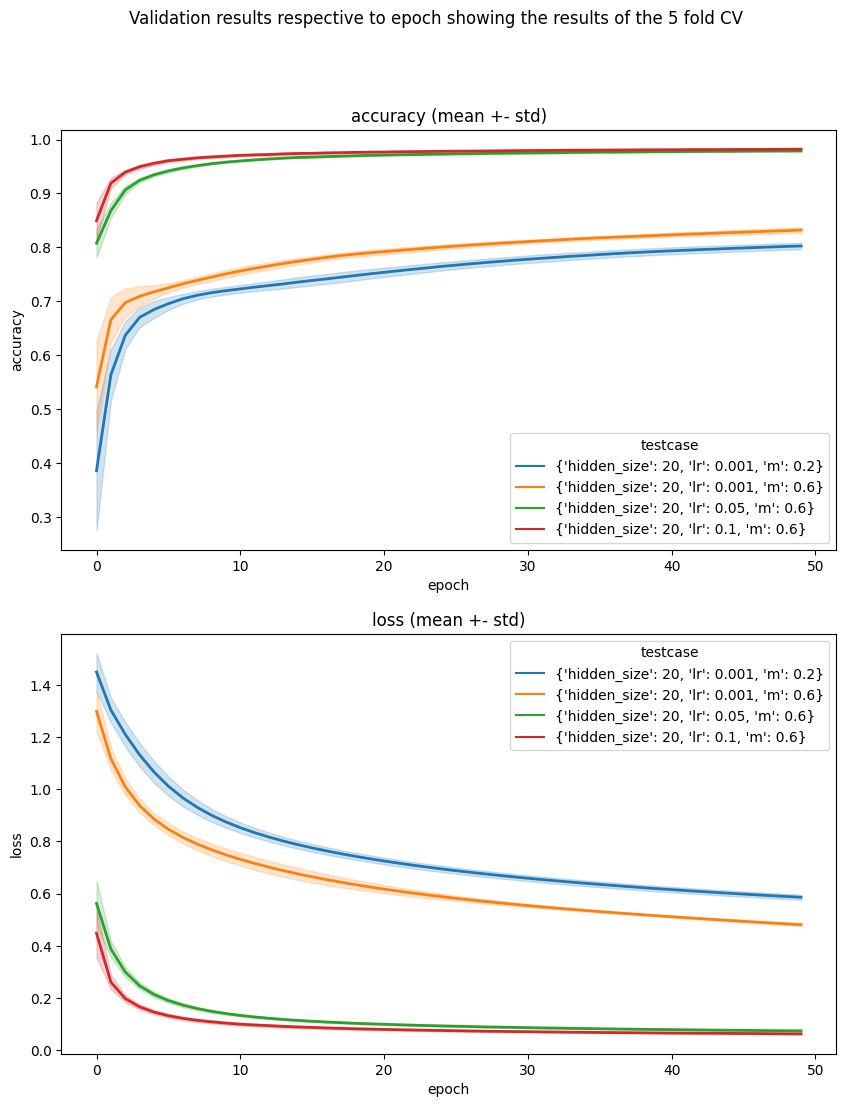

In [12]:
homework_utils.visualisation_with_confidence(lr_m_test_results, validation_only=True)

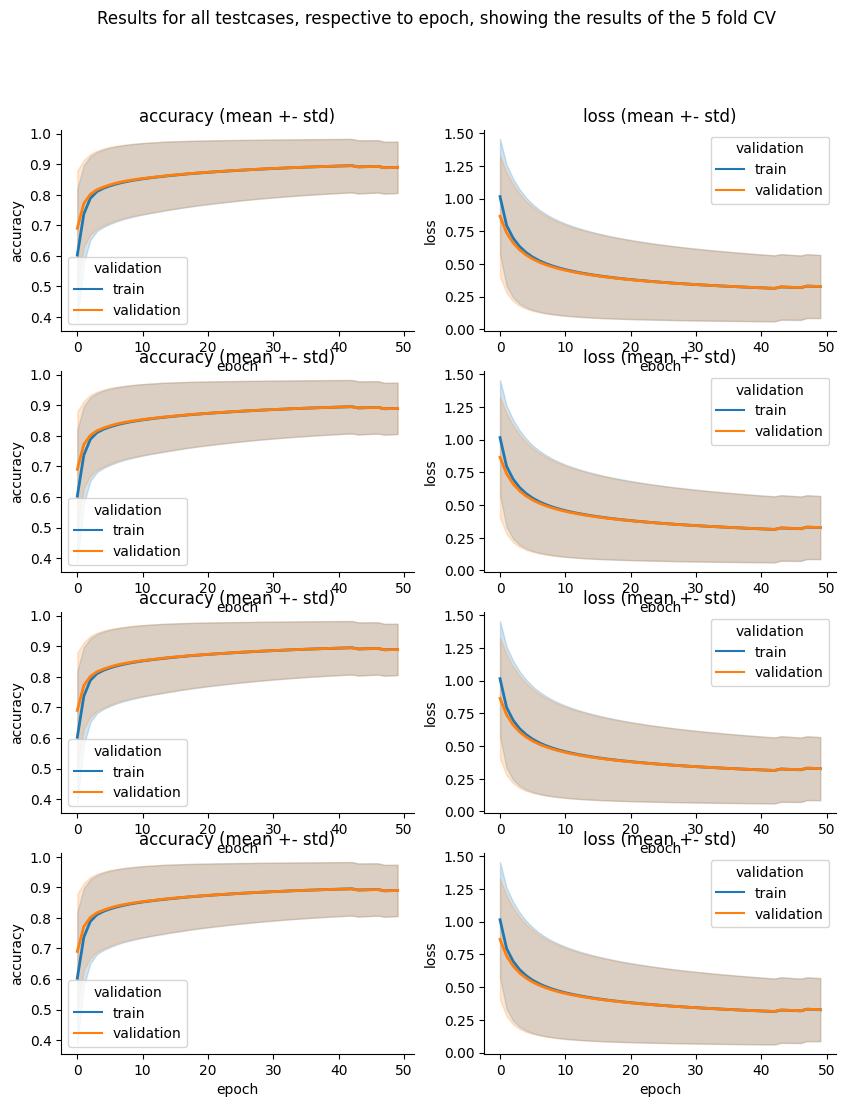

In [13]:
homework_utils.visualisation_with_confidence(lr_m_test_results, validation_only=False)

In [14]:
from keras import regularizers


def create_normalised_model(coef):
    model = Sequential()
    model.add(
        Dense(
            I + O,
            input_dim=len(feature_cols),
            activation="sigmoid",
            bias_regularizer=regularizers.L2(coef),
        )
    )
    model.add(Dense(O, activation="softmax"))
    optimizer = Adam(learning_rate=0.01)
    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["categorical_crossentropy", "mean_squared_error", "accuracy"],
    )
    return model

In [15]:
test_matrice_reg = [
    {"coef": 0.1},
    {"coef": 0.5},
    {"coef": 0.9},
]

regularization_test_results = homework_utils.wrap_test_case(
    test_matrice_reg,
    create_normalised_model,
    df[feature_cols].values,
    df[target_col].values,
)

INFO:root:Running testcase {'coef': 0.1}


Epoch 1/50
1326/1326 [==============================] - 26s 19ms/step - loss: 0.3089 - categorical_crossentropy: 0.3084 - mean_squared_error: 0.0309 - accuracy: 0.9005 - val_loss: 0.1577 - val_categorical_crossentropy: 0.1573 - val_mean_squared_error: 0.0149 - val_accuracy: 0.9528
Epoch 2/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.1274 - categorical_crossentropy: 0.1271 - mean_squared_error: 0.0121 - accuracy: 0.9610 - val_loss: 0.1150 - val_categorical_crossentropy: 0.1147 - val_mean_squared_error: 0.0106 - val_accuracy: 0.9668
Epoch 3/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.1017 - categorical_crossentropy: 0.1014 - mean_squared_error: 0.0095 - accuracy: 0.9703 - val_loss: 0.0998 - val_categorical_crossentropy: 0.0991 - val_mean_squared_error: 0.0094 - val_accuracy: 0.9702
Epoch 4/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.0907 - categorical_crossentropy: 0.0903 - mean_squared_error: 0.0084 - acc

INFO:root:Running testcase {'coef': 0.5}


Epoch 1/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.3278 - categorical_crossentropy: 0.3273 - mean_squared_error: 0.0326 - accuracy: 0.8932 - val_loss: 0.1647 - val_categorical_crossentropy: 0.1645 - val_mean_squared_error: 0.0160 - val_accuracy: 0.9481
Epoch 2/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.1318 - categorical_crossentropy: 0.1314 - mean_squared_error: 0.0128 - accuracy: 0.9591 - val_loss: 0.1154 - val_categorical_crossentropy: 0.1151 - val_mean_squared_error: 0.0110 - val_accuracy: 0.9655
Epoch 3/50
1326/1326 [==============================] - 25s 18ms/step - loss: 0.1002 - categorical_crossentropy: 0.0998 - mean_squared_error: 0.0096 - accuracy: 0.9697 - val_loss: 0.0954 - val_categorical_crossentropy: 0.0951 - val_mean_squared_error: 0.0089 - val_accuracy: 0.9725
Epoch 4/50
1326/1326 [==============================] - 24s 18ms/step - loss: 0.0864 - categorical_crossentropy: 0.0861 - mean_squared_error: 0.0081 - acc

INFO:root:Running testcase {'coef': 0.9}


Epoch 1/50
1326/1326 [==============================] - 26s 19ms/step - loss: 0.3302 - categorical_crossentropy: 0.3298 - mean_squared_error: 0.0329 - accuracy: 0.8934 - val_loss: 0.1593 - val_categorical_crossentropy: 0.1587 - val_mean_squared_error: 0.0150 - val_accuracy: 0.9538
Epoch 2/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.1282 - categorical_crossentropy: 0.1280 - mean_squared_error: 0.0122 - accuracy: 0.9614 - val_loss: 0.1121 - val_categorical_crossentropy: 0.1115 - val_mean_squared_error: 0.0107 - val_accuracy: 0.9659
Epoch 3/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.1018 - categorical_crossentropy: 0.1015 - mean_squared_error: 0.0096 - accuracy: 0.9696 - val_loss: 0.0964 - val_categorical_crossentropy: 0.0960 - val_mean_squared_error: 0.0090 - val_accuracy: 0.9718
Epoch 4/50
1326/1326 [==============================] - 25s 19ms/step - loss: 0.0912 - categorical_crossentropy: 0.0909 - mean_squared_error: 0.0086 - acc

In [16]:
for result in regularization_test_results:
    print(result.testcase)
    homework_utils.print_scores(homework_utils.score_from_histories(result.histories))
    print("=" * 30)

{'coef': 0.1}
Validation Cross Entropy: 0.0698 (+/- 0.0051)
Validation MSE: 0.0064 (+/- 0.0005)
Validation Accuracy: 0.9799 (+/- 0.0015)
{'coef': 0.5}
Validation Cross Entropy: 0.0729 (+/- 0.0034)
Validation MSE: 0.0068 (+/- 0.0002)
Validation Accuracy: 0.9785 (+/- 0.0008)
{'coef': 0.9}
Validation Cross Entropy: 0.0698 (+/- 0.0023)
Validation MSE: 0.0065 (+/- 0.0002)
Validation Accuracy: 0.9793 (+/- 0.0007)


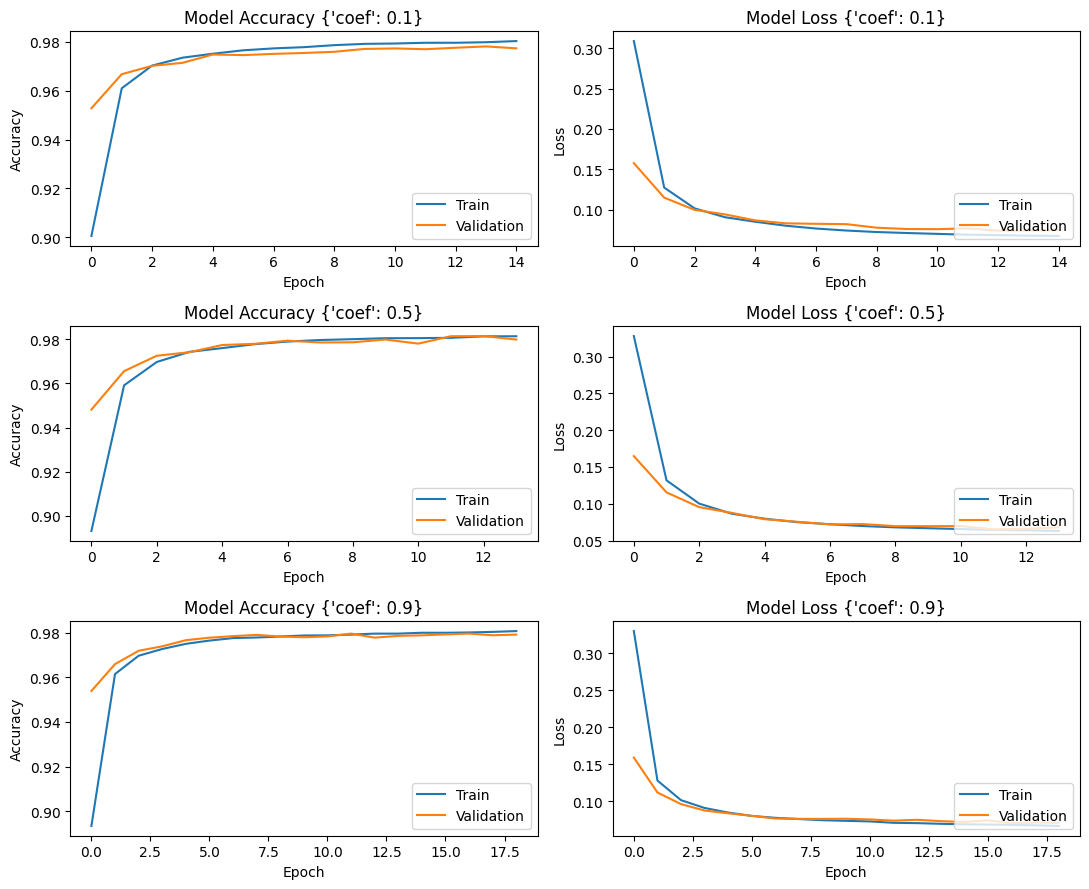

In [17]:
homework_utils.figure_from_histories(
    [I.histories[0] for I in regularization_test_results],
    [I.testcase for I in regularization_test_results],
)

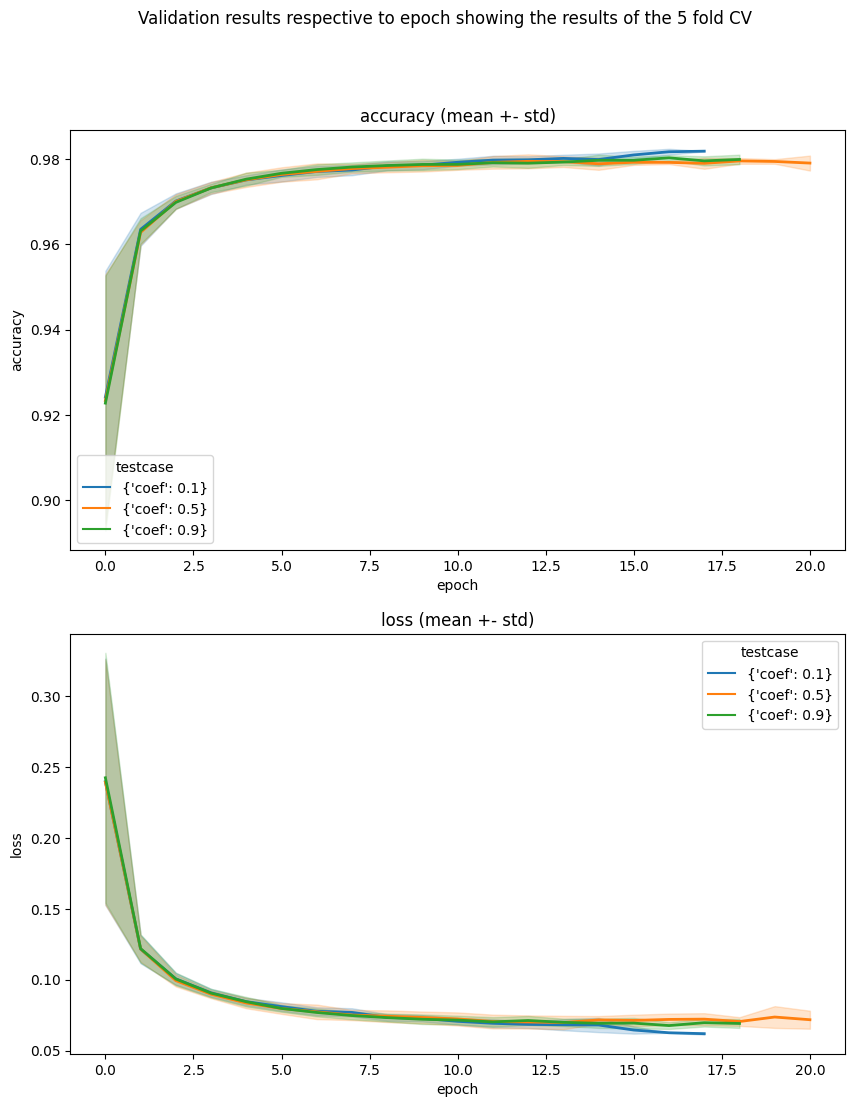

In [18]:
homework_utils.visualisation_with_confidence(
    regularization_test_results, validation_only=True
)

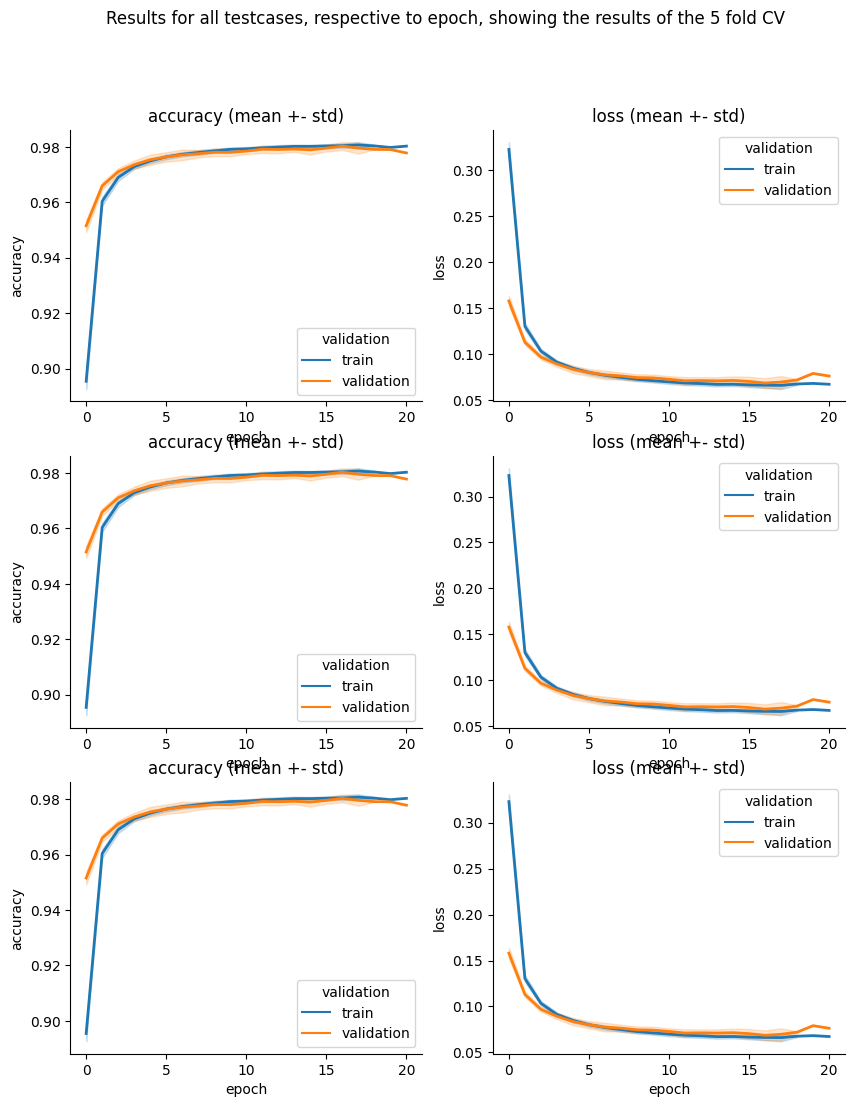

In [19]:
homework_utils.visualisation_with_confidence(
    regularization_test_results, validation_only=False
)

In [20]:
# run generalisation test
df_scaled = pd.read_parquet("dataset/scaled_train_data.parquet")
df_scaled_validation = pd.read_parquet("dataset/scaled_validation_data.parquet")

In [21]:
reload(homework_utils)
hiddensize_test_resuts_ext = homework_utils.wrap_test_case(
    hidden_layer_matrice,
    create_model,
    df_scaled[feature_cols].values,
    df_scaled[target_col].values,
    df_scaled_validation[feature_cols].values,
    df_scaled_validation[target_col].values,
)


INFO:root:Running testcase {'hidden_size': 5}


Epoch 1/50
1525/1525 [==============================] - 26s 17ms/step - loss: 0.4837 - categorical_crossentropy: 0.4837 - mean_squared_error: 0.0481 - accuracy: 0.8364 - val_loss: 1.1466 - val_categorical_crossentropy: 1.1465 - val_mean_squared_error: 0.0916 - val_accuracy: 0.7406
Epoch 2/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.2676 - categorical_crossentropy: 0.2676 - mean_squared_error: 0.0270 - accuracy: 0.9052 - val_loss: 1.2361 - val_categorical_crossentropy: 1.2360 - val_mean_squared_error: 0.0886 - val_accuracy: 0.7308
Epoch 3/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.2472 - categorical_crossentropy: 0.2472 - mean_squared_error: 0.0247 - accuracy: 0.9147 - val_loss: 1.3613 - val_categorical_crossentropy: 1.3613 - val_mean_squared_error: 0.0848 - val_accuracy: 0.7315
Epoch 4/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.2375 - categorical_crossentropy: 0.2375 - mean_squared_error: 0.0235 - acc

INFO:root:Running testcase {'hidden_size': 10}


Epoch 1/50
1525/1525 [==============================] - 26s 17ms/step - loss: 0.3354 - categorical_crossentropy: 0.3354 - mean_squared_error: 0.0331 - accuracy: 0.8930 - val_loss: 1.9494 - val_categorical_crossentropy: 1.9494 - val_mean_squared_error: 0.2014 - val_accuracy: 0.1907
Epoch 2/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.1562 - categorical_crossentropy: 0.1562 - mean_squared_error: 0.0151 - accuracy: 0.9509 - val_loss: 3.4738 - val_categorical_crossentropy: 3.4738 - val_mean_squared_error: 0.2477 - val_accuracy: 0.1800
Epoch 3/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.1292 - categorical_crossentropy: 0.1292 - mean_squared_error: 0.0124 - accuracy: 0.9603 - val_loss: 3.2003 - val_categorical_crossentropy: 3.2002 - val_mean_squared_error: 0.2555 - val_accuracy: 0.1540
Epoch 4/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.1203 - categorical_crossentropy: 0.1202 - mean_squared_error: 0.0115 - acc

INFO:root:Running testcase {'hidden_size': 20}


Epoch 1/50
1525/1525 [==============================] - 26s 17ms/step - loss: 0.2729 - categorical_crossentropy: 0.2729 - mean_squared_error: 0.0270 - accuracy: 0.9126 - val_loss: 1.5601 - val_categorical_crossentropy: 1.5602 - val_mean_squared_error: 0.1610 - val_accuracy: 0.4372
Epoch 2/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.0981 - categorical_crossentropy: 0.0981 - mean_squared_error: 0.0092 - accuracy: 0.9709 - val_loss: 1.8194 - val_categorical_crossentropy: 1.8192 - val_mean_squared_error: 0.1641 - val_accuracy: 0.4906
Epoch 3/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.0763 - categorical_crossentropy: 0.0763 - mean_squared_error: 0.0071 - accuracy: 0.9776 - val_loss: 2.0652 - val_categorical_crossentropy: 2.0654 - val_mean_squared_error: 0.1858 - val_accuracy: 0.4388
Epoch 4/50
1525/1525 [==============================] - 25s 17ms/step - loss: 0.0666 - categorical_crossentropy: 0.0666 - mean_squared_error: 0.0062 - acc

In [22]:
for result in hiddensize_test_resuts_ext:
    print(result.testcase)
    homework_utils.print_scores(homework_utils.score_from_histories(result.histories),validation_only=False)
    print("=" * 30)

{'hidden_size': 5}
Test Cross Entropy: 0.1893 (+/- 0.0000)
Test MSE: 0.0183 (+/- 0.0000)
Test Accuracy: 0.9386 (+/- 0.0000)
------------------------------
Validation Cross Entropy: 2.9062 (+/- 0.0000)
Validation MSE: 0.2123 (+/- 0.0000)
Validation Accuracy: 0.3729 (+/- 0.0000)
{'hidden_size': 10}
Test Cross Entropy: 0.0852 (+/- 0.0000)
Test MSE: 0.0078 (+/- 0.0000)
Test Accuracy: 0.9761 (+/- 0.0000)
------------------------------
Validation Cross Entropy: 3.0738 (+/- 0.0000)
Validation MSE: 0.1774 (+/- 0.0000)
Validation Accuracy: 0.4348 (+/- 0.0000)
{'hidden_size': 20}
Test Cross Entropy: 0.0406 (+/- 0.0000)
Test MSE: 0.0038 (+/- 0.0000)
Test Accuracy: 0.9879 (+/- 0.0000)
------------------------------
Validation Cross Entropy: 3.2198 (+/- 0.0000)
Validation MSE: 0.1663 (+/- 0.0000)
Validation Accuracy: 0.5001 (+/- 0.0000)


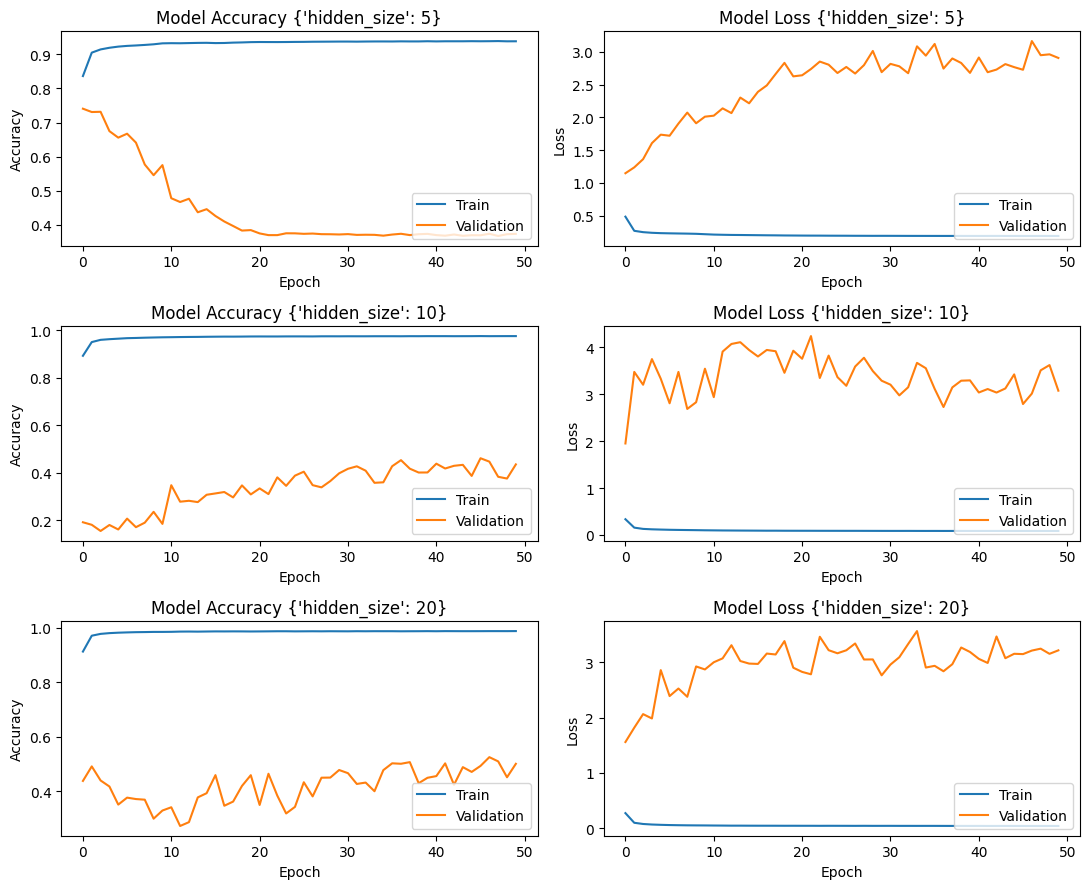

In [23]:
homework_utils.figure_from_histories(
    [I.histories[0] for I in hiddensize_test_resuts_ext],
    [I.testcase for I in hiddensize_test_resuts_ext],
)

In [24]:
def create_normalised_model_extended(hidden_size,coef,mode=None):
    model = Sequential()
    model.add(
        Dense(
            hidden_size,
            input_dim=len(feature_cols),
            activation="sigmoid",
            bias_regularizer= regularizers.L2(coef) if mode == 'l2' else regularizers.L1(coef),
        )
    )
    model.add(Dense(O, activation="softmax"))
    optimizer = Adam(learning_rate=0.01)
    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["categorical_crossentropy", "mean_squared_error", "accuracy"],
    )
    return model

In [25]:
coefs = [0.1,0.5,0.9]
modes = ['l1','l2']
hdsizes = [5,7,9]
test_matrice_reg_2 = list()
for hs in hdsizes:
    for c in coefs:
        for mode in modes:
            test_matrice_reg_2.append(
                {'hidden_size':hs,'coef':c,'mode':mode}
            )

In [26]:
regularization_test_results_ext = homework_utils.wrap_test_case(
    test_matrice_reg_2,
    create_normalised_model_extended,
    df[feature_cols].values,
    df[target_col].values,
    df_scaled_validation[feature_cols].values,
    df_scaled_validation[target_col].values,
)


INFO:root:Running testcase {'hidden_size': 5, 'coef': 0.1, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 30s 17ms/step - loss: 0.8910 - categorical_crossentropy: 0.8904 - mean_squared_error: 0.0918 - accuracy: 0.6671 - val_loss: 1.2581 - val_categorical_crossentropy: 1.2577 - val_mean_squared_error: 0.1288 - val_accuracy: 0.5076
Epoch 2/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.8083 - categorical_crossentropy: 0.8078 - mean_squared_error: 0.0855 - accuracy: 0.6880 - val_loss: 1.3977 - val_categorical_crossentropy: 1.3972 - val_mean_squared_error: 0.1341 - val_accuracy: 0.5008
Epoch 3/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.8032 - categorical_crossentropy: 0.8027 - mean_squared_error: 0.0844 - accuracy: 0.6940 - val_loss: 1.2813 - val_categorical_crossentropy: 1.2809 - val_mean_squared_error: 0.1231 - val_accuracy: 0.5866
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.8000 - categorical_crossentropy: 0.7995 - mean_squared_error: 0.0839 - acc

INFO:root:Running testcase {'hidden_size': 5, 'coef': 0.1, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.9271 - categorical_crossentropy: 0.9271 - mean_squared_error: 0.0936 - accuracy: 0.6788 - val_loss: 3.0457 - val_categorical_crossentropy: 3.0456 - val_mean_squared_error: 0.2142 - val_accuracy: 0.1634
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.7816 - categorical_crossentropy: 0.7815 - mean_squared_error: 0.0813 - accuracy: 0.7165 - val_loss: 3.3802 - val_categorical_crossentropy: 3.3802 - val_mean_squared_error: 0.2178 - val_accuracy: 0.2163
Epoch 3/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.7714 - categorical_crossentropy: 0.7714 - mean_squared_error: 0.0811 - accuracy: 0.7132 - val_loss: 3.6099 - val_categorical_crossentropy: 3.6096 - val_mean_squared_error: 0.2325 - val_accuracy: 0.1650
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.7588 - categorical_crossentropy: 0.7588 - mean_squared_error: 0.0807 - acc

INFO:root:Running testcase {'hidden_size': 5, 'coef': 0.5, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 30s 17ms/step - loss: 0.8520 - categorical_crossentropy: 0.8489 - mean_squared_error: 0.0843 - accuracy: 0.7063 - val_loss: 2.6600 - val_categorical_crossentropy: 2.6569 - val_mean_squared_error: 0.2536 - val_accuracy: 0.1647
Epoch 2/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.7191 - categorical_crossentropy: 0.7163 - mean_squared_error: 0.0712 - accuracy: 0.7583 - val_loss: 2.9783 - val_categorical_crossentropy: 2.9765 - val_mean_squared_error: 0.2591 - val_accuracy: 0.1790
Epoch 3/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.7081 - categorical_crossentropy: 0.7056 - mean_squared_error: 0.0699 - accuracy: 0.7615 - val_loss: 2.9566 - val_categorical_crossentropy: 2.9528 - val_mean_squared_error: 0.2567 - val_accuracy: 0.2022
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.7054 - categorical_crossentropy: 0.7030 - mean_squared_error: 0.0698 - acc

INFO:root:Running testcase {'hidden_size': 5, 'coef': 0.5, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.7229 - categorical_crossentropy: 0.7229 - mean_squared_error: 0.0735 - accuracy: 0.7467 - val_loss: 0.7440 - val_categorical_crossentropy: 0.7439 - val_mean_squared_error: 0.0751 - val_accuracy: 0.7403
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5218 - categorical_crossentropy: 0.5217 - mean_squared_error: 0.0513 - accuracy: 0.8334 - val_loss: 0.7924 - val_categorical_crossentropy: 0.7924 - val_mean_squared_error: 0.0802 - val_accuracy: 0.7309
Epoch 3/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.4987 - categorical_crossentropy: 0.4986 - mean_squared_error: 0.0484 - accuracy: 0.8450 - val_loss: 0.7795 - val_categorical_crossentropy: 0.7794 - val_mean_squared_error: 0.0784 - val_accuracy: 0.7486
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.4910 - categorical_crossentropy: 0.4909 - mean_squared_error: 0.0480 - acc

INFO:root:Running testcase {'hidden_size': 5, 'coef': 0.9, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 30s 17ms/step - loss: 0.8620 - categorical_crossentropy: 0.8534 - mean_squared_error: 0.0853 - accuracy: 0.6935 - val_loss: 1.3634 - val_categorical_crossentropy: 1.3545 - val_mean_squared_error: 0.1225 - val_accuracy: 0.5087
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6972 - categorical_crossentropy: 0.6887 - mean_squared_error: 0.0685 - accuracy: 0.7677 - val_loss: 1.5874 - val_categorical_crossentropy: 1.5792 - val_mean_squared_error: 0.1470 - val_accuracy: 0.4943
Epoch 3/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.6665 - categorical_crossentropy: 0.6580 - mean_squared_error: 0.0664 - accuracy: 0.7737 - val_loss: 1.7968 - val_categorical_crossentropy: 1.7853 - val_mean_squared_error: 0.1591 - val_accuracy: 0.4935
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.6601 - categorical_crossentropy: 0.6514 - mean_squared_error: 0.0661 - acc

INFO:root:Running testcase {'hidden_size': 5, 'coef': 0.9, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.7931 - categorical_crossentropy: 0.7931 - mean_squared_error: 0.0806 - accuracy: 0.7200 - val_loss: 1.4555 - val_categorical_crossentropy: 1.4553 - val_mean_squared_error: 0.1637 - val_accuracy: 0.1696
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6250 - categorical_crossentropy: 0.6250 - mean_squared_error: 0.0638 - accuracy: 0.7788 - val_loss: 2.0157 - val_categorical_crossentropy: 2.0158 - val_mean_squared_error: 0.2246 - val_accuracy: 0.0824
Epoch 3/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6065 - categorical_crossentropy: 0.6065 - mean_squared_error: 0.0613 - accuracy: 0.7910 - val_loss: 2.6233 - val_categorical_crossentropy: 2.6233 - val_mean_squared_error: 0.2435 - val_accuracy: 0.1449
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6040 - categorical_crossentropy: 0.6040 - mean_squared_error: 0.0611 - acc

INFO:root:Running testcase {'hidden_size': 7, 'coef': 0.1, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 30s 17ms/step - loss: 0.7505 - categorical_crossentropy: 0.7498 - mean_squared_error: 0.0746 - accuracy: 0.7548 - val_loss: 1.2171 - val_categorical_crossentropy: 1.2164 - val_mean_squared_error: 0.1158 - val_accuracy: 0.5125
Epoch 2/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5677 - categorical_crossentropy: 0.5671 - mean_squared_error: 0.0558 - accuracy: 0.8236 - val_loss: 1.3212 - val_categorical_crossentropy: 1.3208 - val_mean_squared_error: 0.1195 - val_accuracy: 0.5106
Epoch 3/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5264 - categorical_crossentropy: 0.5257 - mean_squared_error: 0.0517 - accuracy: 0.8315 - val_loss: 1.4275 - val_categorical_crossentropy: 1.4269 - val_mean_squared_error: 0.1302 - val_accuracy: 0.5169
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.4976 - categorical_crossentropy: 0.4968 - mean_squared_error: 0.0487 - acc

INFO:root:Running testcase {'hidden_size': 7, 'coef': 0.1, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.7736 - categorical_crossentropy: 0.7736 - mean_squared_error: 0.0777 - accuracy: 0.7387 - val_loss: 1.3955 - val_categorical_crossentropy: 1.3956 - val_mean_squared_error: 0.1549 - val_accuracy: 0.5023
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5926 - categorical_crossentropy: 0.5926 - mean_squared_error: 0.0596 - accuracy: 0.8090 - val_loss: 1.9288 - val_categorical_crossentropy: 1.9288 - val_mean_squared_error: 0.1704 - val_accuracy: 0.5226
Epoch 3/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5421 - categorical_crossentropy: 0.5421 - mean_squared_error: 0.0534 - accuracy: 0.8280 - val_loss: 1.9812 - val_categorical_crossentropy: 1.9810 - val_mean_squared_error: 0.1736 - val_accuracy: 0.4925
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5275 - categorical_crossentropy: 0.5274 - mean_squared_error: 0.0519 - acc

INFO:root:Running testcase {'hidden_size': 7, 'coef': 0.5, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 31s 18ms/step - loss: 0.7412 - categorical_crossentropy: 0.7359 - mean_squared_error: 0.0743 - accuracy: 0.7382 - val_loss: 0.9395 - val_categorical_crossentropy: 0.9357 - val_mean_squared_error: 0.1030 - val_accuracy: 0.5276
Epoch 2/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5454 - categorical_crossentropy: 0.5407 - mean_squared_error: 0.0546 - accuracy: 0.8189 - val_loss: 1.1487 - val_categorical_crossentropy: 1.1428 - val_mean_squared_error: 0.1242 - val_accuracy: 0.5299
Epoch 3/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5053 - categorical_crossentropy: 0.5010 - mean_squared_error: 0.0504 - accuracy: 0.8391 - val_loss: 1.4879 - val_categorical_crossentropy: 1.4841 - val_mean_squared_error: 0.1655 - val_accuracy: 0.4032
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.4913 - categorical_crossentropy: 0.4866 - mean_squared_error: 0.0485 - acc

INFO:root:Running testcase {'hidden_size': 7, 'coef': 0.5, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.8146 - categorical_crossentropy: 0.8145 - mean_squared_error: 0.0846 - accuracy: 0.6768 - val_loss: 1.1350 - val_categorical_crossentropy: 1.1349 - val_mean_squared_error: 0.1241 - val_accuracy: 0.5403
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6359 - categorical_crossentropy: 0.6359 - mean_squared_error: 0.0645 - accuracy: 0.7860 - val_loss: 2.1530 - val_categorical_crossentropy: 2.1530 - val_mean_squared_error: 0.2092 - val_accuracy: 0.3172
Epoch 3/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6042 - categorical_crossentropy: 0.6042 - mean_squared_error: 0.0602 - accuracy: 0.8026 - val_loss: 2.4219 - val_categorical_crossentropy: 2.4219 - val_mean_squared_error: 0.2078 - val_accuracy: 0.3448
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5537 - categorical_crossentropy: 0.5536 - mean_squared_error: 0.0547 - acc

INFO:root:Running testcase {'hidden_size': 7, 'coef': 0.9, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 30s 17ms/step - loss: 0.6956 - categorical_crossentropy: 0.6892 - mean_squared_error: 0.0698 - accuracy: 0.7605 - val_loss: 2.1762 - val_categorical_crossentropy: 2.1728 - val_mean_squared_error: 0.2089 - val_accuracy: 0.0992
Epoch 2/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5593 - categorical_crossentropy: 0.5543 - mean_squared_error: 0.0548 - accuracy: 0.8226 - val_loss: 3.8640 - val_categorical_crossentropy: 3.8511 - val_mean_squared_error: 0.2826 - val_accuracy: 0.0901
Epoch 3/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5263 - categorical_crossentropy: 0.5206 - mean_squared_error: 0.0510 - accuracy: 0.8362 - val_loss: 4.2677 - val_categorical_crossentropy: 4.2471 - val_mean_squared_error: 0.3110 - val_accuracy: 0.0878
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5057 - categorical_crossentropy: 0.4994 - mean_squared_error: 0.0485 - acc

INFO:root:Running testcase {'hidden_size': 7, 'coef': 0.9, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 31s 18ms/step - loss: 0.8184 - categorical_crossentropy: 0.8183 - mean_squared_error: 0.0828 - accuracy: 0.7237 - val_loss: 1.1882 - val_categorical_crossentropy: 1.1882 - val_mean_squared_error: 0.1282 - val_accuracy: 0.4788
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6964 - categorical_crossentropy: 0.6964 - mean_squared_error: 0.0732 - accuracy: 0.7492 - val_loss: 1.4642 - val_categorical_crossentropy: 1.4642 - val_mean_squared_error: 0.1477 - val_accuracy: 0.3854
Epoch 3/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6740 - categorical_crossentropy: 0.6740 - mean_squared_error: 0.0719 - accuracy: 0.7474 - val_loss: 1.8848 - val_categorical_crossentropy: 1.8847 - val_mean_squared_error: 0.1724 - val_accuracy: 0.3447
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6636 - categorical_crossentropy: 0.6636 - mean_squared_error: 0.0713 - acc

INFO:root:Running testcase {'hidden_size': 9, 'coef': 0.1, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 30s 17ms/step - loss: 0.6896 - categorical_crossentropy: 0.6888 - mean_squared_error: 0.0681 - accuracy: 0.7790 - val_loss: 2.0291 - val_categorical_crossentropy: 2.0285 - val_mean_squared_error: 0.1997 - val_accuracy: 0.3160
Epoch 2/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5609 - categorical_crossentropy: 0.5601 - mean_squared_error: 0.0557 - accuracy: 0.8204 - val_loss: 2.1750 - val_categorical_crossentropy: 2.1744 - val_mean_squared_error: 0.1989 - val_accuracy: 0.3894
Epoch 3/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5275 - categorical_crossentropy: 0.5267 - mean_squared_error: 0.0520 - accuracy: 0.8320 - val_loss: 2.2601 - val_categorical_crossentropy: 2.2594 - val_mean_squared_error: 0.2220 - val_accuracy: 0.2938
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.4904 - categorical_crossentropy: 0.4896 - mean_squared_error: 0.0484 - acc

INFO:root:Running testcase {'hidden_size': 9, 'coef': 0.1, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.6733 - categorical_crossentropy: 0.6732 - mean_squared_error: 0.0678 - accuracy: 0.7757 - val_loss: 2.0875 - val_categorical_crossentropy: 2.0874 - val_mean_squared_error: 0.2102 - val_accuracy: 0.0961
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5202 - categorical_crossentropy: 0.5202 - mean_squared_error: 0.0510 - accuracy: 0.8418 - val_loss: 3.9583 - val_categorical_crossentropy: 3.9584 - val_mean_squared_error: 0.3075 - val_accuracy: 0.0597
Epoch 3/50
1657/1657 [==============================] - 30s 18ms/step - loss: 0.4720 - categorical_crossentropy: 0.4720 - mean_squared_error: 0.0456 - accuracy: 0.8554 - val_loss: 3.8510 - val_categorical_crossentropy: 3.8511 - val_mean_squared_error: 0.2859 - val_accuracy: 0.0680
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.4531 - categorical_crossentropy: 0.4531 - mean_squared_error: 0.0439 - acc

INFO:root:Running testcase {'hidden_size': 9, 'coef': 0.5, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 30s 18ms/step - loss: 0.7003 - categorical_crossentropy: 0.6949 - mean_squared_error: 0.0676 - accuracy: 0.7839 - val_loss: 1.8264 - val_categorical_crossentropy: 1.8203 - val_mean_squared_error: 0.1869 - val_accuracy: 0.2786
Epoch 2/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5446 - categorical_crossentropy: 0.5390 - mean_squared_error: 0.0523 - accuracy: 0.8361 - val_loss: 2.6312 - val_categorical_crossentropy: 2.6256 - val_mean_squared_error: 0.2337 - val_accuracy: 0.3304
Epoch 3/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5039 - categorical_crossentropy: 0.4985 - mean_squared_error: 0.0489 - accuracy: 0.8388 - val_loss: 3.5084 - val_categorical_crossentropy: 3.5034 - val_mean_squared_error: 0.2540 - val_accuracy: 0.3112
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.4832 - categorical_crossentropy: 0.4777 - mean_squared_error: 0.0469 - acc

INFO:root:Running testcase {'hidden_size': 9, 'coef': 0.5, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.6551 - categorical_crossentropy: 0.6550 - mean_squared_error: 0.0664 - accuracy: 0.7700 - val_loss: 2.2050 - val_categorical_crossentropy: 2.2049 - val_mean_squared_error: 0.1952 - val_accuracy: 0.3036
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5241 - categorical_crossentropy: 0.5240 - mean_squared_error: 0.0522 - accuracy: 0.8269 - val_loss: 2.0829 - val_categorical_crossentropy: 2.0827 - val_mean_squared_error: 0.1646 - val_accuracy: 0.5562
Epoch 3/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.4970 - categorical_crossentropy: 0.4970 - mean_squared_error: 0.0490 - accuracy: 0.8450 - val_loss: 2.2599 - val_categorical_crossentropy: 2.2598 - val_mean_squared_error: 0.1634 - val_accuracy: 0.5619
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.4741 - categorical_crossentropy: 0.4740 - mean_squared_error: 0.0467 - acc

INFO:root:Running testcase {'hidden_size': 9, 'coef': 0.9, 'mode': 'l1'}


Epoch 1/50
1657/1657 [==============================] - 30s 17ms/step - loss: 0.7415 - categorical_crossentropy: 0.7333 - mean_squared_error: 0.0740 - accuracy: 0.7458 - val_loss: 2.6621 - val_categorical_crossentropy: 2.6535 - val_mean_squared_error: 0.2320 - val_accuracy: 0.1624
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.6085 - categorical_crossentropy: 0.5997 - mean_squared_error: 0.0606 - accuracy: 0.7982 - val_loss: 3.7704 - val_categorical_crossentropy: 3.7616 - val_mean_squared_error: 0.2472 - val_accuracy: 0.1467
Epoch 3/50
1657/1657 [==============================] - 29s 18ms/step - loss: 0.5773 - categorical_crossentropy: 0.5683 - mean_squared_error: 0.0567 - accuracy: 0.8149 - val_loss: 3.2763 - val_categorical_crossentropy: 3.2689 - val_mean_squared_error: 0.2320 - val_accuracy: 0.1477
Epoch 4/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.5566 - categorical_crossentropy: 0.5477 - mean_squared_error: 0.0544 - acc

INFO:root:Running testcase {'hidden_size': 9, 'coef': 0.9, 'mode': 'l2'}


Epoch 1/50
1657/1657 [==============================] - 29s 17ms/step - loss: 0.7500 - categorical_crossentropy: 0.7500 - mean_squared_error: 0.0747 - accuracy: 0.7512 - val_loss: 1.2911 - val_categorical_crossentropy: 1.2911 - val_mean_squared_error: 0.1390 - val_accuracy: 0.5745
Epoch 2/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5668 - categorical_crossentropy: 0.5668 - mean_squared_error: 0.0556 - accuracy: 0.8160 - val_loss: 1.1353 - val_categorical_crossentropy: 1.1352 - val_mean_squared_error: 0.1298 - val_accuracy: 0.5627
Epoch 3/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5391 - categorical_crossentropy: 0.5391 - mean_squared_error: 0.0528 - accuracy: 0.8275 - val_loss: 0.8658 - val_categorical_crossentropy: 0.8659 - val_mean_squared_error: 0.0976 - val_accuracy: 0.5712
Epoch 4/50
1657/1657 [==============================] - 28s 17ms/step - loss: 0.5165 - categorical_crossentropy: 0.5165 - mean_squared_error: 0.0505 - acc

In [27]:
for result in regularization_test_results_ext:
    print(result.testcase)
    homework_utils.print_scores(homework_utils.score_from_histories(result.histories),validation_only=False)
    print("=" * 30)

{'hidden_size': 5, 'coef': 0.1, 'mode': 'l1'}
Test Cross Entropy: 0.7675 (+/- 0.0000)
Test MSE: 0.0778 (+/- 0.0000)
Test Accuracy: 0.7254 (+/- 0.0000)
------------------------------
Validation Cross Entropy: 2.5216 (+/- 0.0000)
Validation MSE: 0.1775 (+/- 0.0000)
Validation Accuracy: 0.2530 (+/- 0.0000)
{'hidden_size': 5, 'coef': 0.1, 'mode': 'l2'}
Test Cross Entropy: 0.6455 (+/- 0.0000)
Test MSE: 0.0687 (+/- 0.0000)
Test Accuracy: 0.7543 (+/- 0.0000)
------------------------------
Validation Cross Entropy: 3.7212 (+/- 0.0000)
Validation MSE: 0.2885 (+/- 0.0000)
Validation Accuracy: 0.1373 (+/- 0.0000)
{'hidden_size': 5, 'coef': 0.5, 'mode': 'l1'}
Test Cross Entropy: 0.6905 (+/- 0.0000)
Test MSE: 0.0681 (+/- 0.0000)
Test Accuracy: 0.7695 (+/- 0.0000)
------------------------------
Validation Cross Entropy: 4.4844 (+/- 0.0000)
Validation MSE: 0.3136 (+/- 0.0000)
Validation Accuracy: 0.0980 (+/- 0.0000)
{'hidden_size': 5, 'coef': 0.5, 'mode': 'l2'}
Test Cross Entropy: 0.4921 (+/- 0.0000)

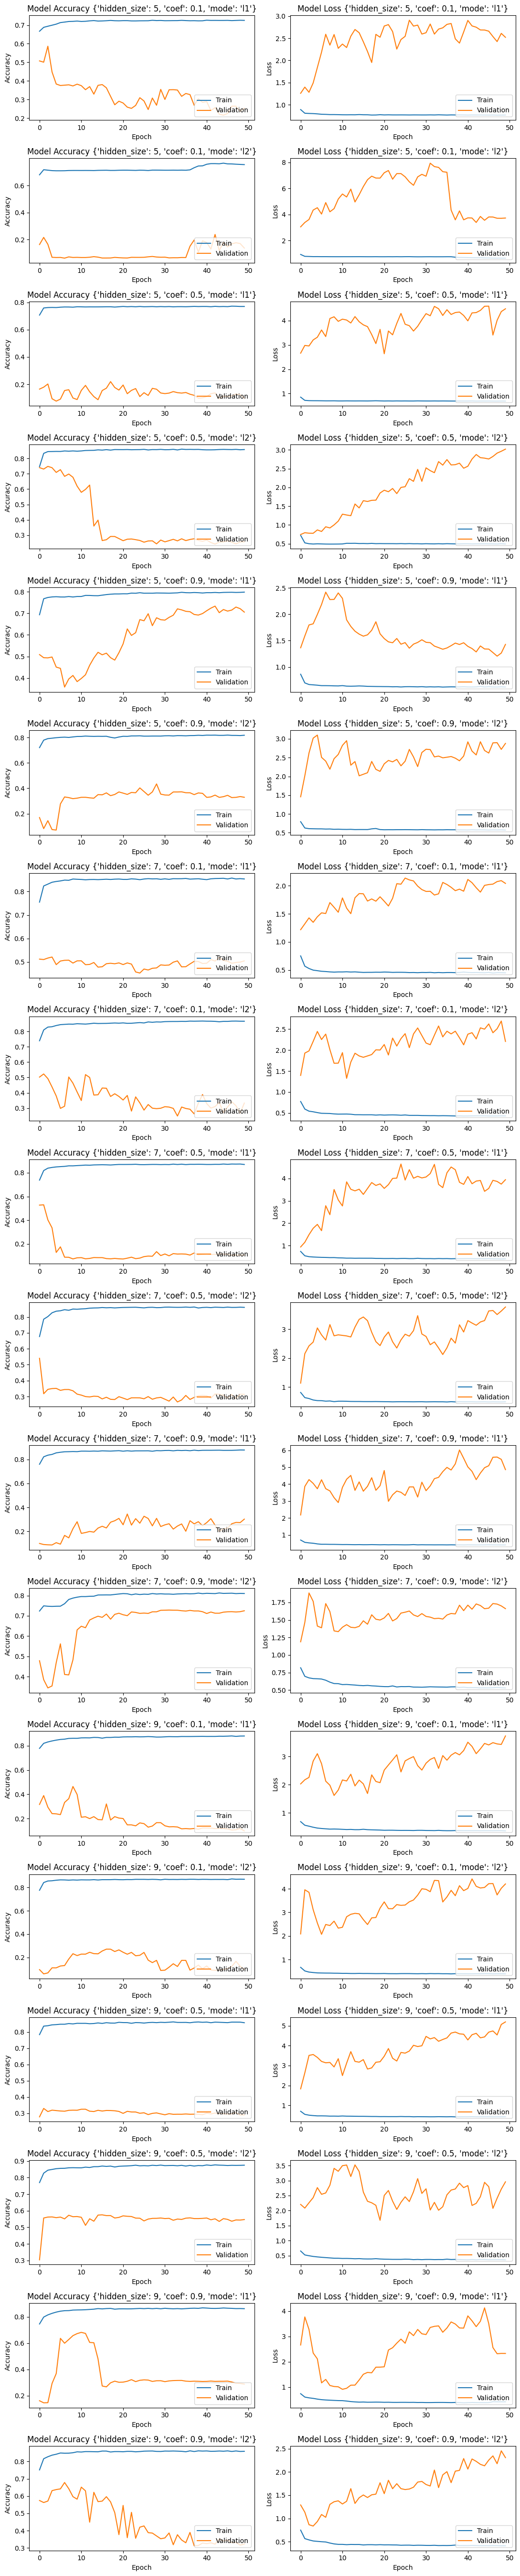

In [28]:
reload(homework_utils)
homework_utils.figure_from_histories(
    [I.histories[0] for I in regularization_test_results_ext],
    [I.testcase for I in regularization_test_results_ext],
)